TWO-WAY ANOVA ANALYSIS: FERTILIZER EFFECTIVENESS STUDY

1. DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------

Overall Summary:
                  count   mean    std    min    25%    50%    75%    max
Fertilizer Crop                                                         
Blend X    Corn     5.0  135.4  26.60  109.0  116.0  128.0  150.0  174.0
           Rice     5.0  141.2  18.82  117.0  125.0  151.0  155.0  158.0
           Soy      5.0  175.8  16.69  153.0  166.0  178.0  187.0  195.0
           Wheat    5.0  131.8  29.06  100.0  112.0  123.0  156.0  168.0
Blend Y    Corn     5.0  159.6  31.28  120.0  132.0  175.0  184.0  187.0
           Rice     5.0  165.4  14.74  142.0  167.0  167.0  168.0  183.0
           Soy      5.0  140.2  12.87  126.0  131.0  140.0  145.0  159.0
           Wheat    5.0  143.2  22.33  120.0  130.0  135.0  155.0  176.0
Blend Z    Corn     5.0  173.6  20.71  138.0  176.0  178.0  186.0  190.0
           Rice 

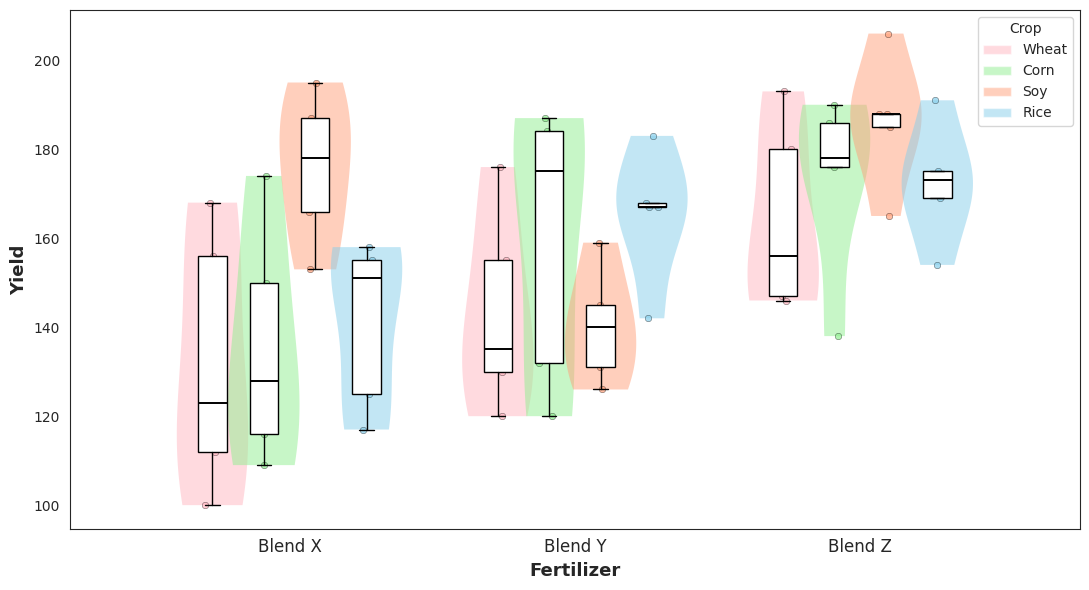

Raincloud plot saved as 'raincloud_plot.png'


3. TWO-WAY ANOVA RESULTS
--------------------------------------------------------------------------------

ANOVA Table:
                         sum_sq    df       F  PR(>F)
C(Fertilizer)           8782.90   2.0  9.9333  0.0002
C(Crop)                 3411.65   3.0  2.5724  0.0649
C(Fertilizer):C(Crop)   6225.90   6.0  2.3471  0.0456
Residual               21220.40  48.0     NaN     NaN


4. EFFECT SIZES (η²)
--------------------------------------------------------------------------------
Fertilizer η² = 0.2216
Crop η²       = 0.0861
Interaction η² = 0.1571


5. POST-HOC TESTS (Tukey HSD)
--------------------------------------------------------------------------------

Post-hoc comparisons for Fertilizer:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
Blend X Blend Y     6.05 0.6909 -11.6559 23.7559  False
Blend X Blend 

In [ ]:
##Test##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set style for plots
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10, 6)

# Create the dataset exactly as before
data = {
    'Fertilizer': ['Blend X']*20 + ['Blend Y']*20 + ['Blend Z']*20,
    'Crop': ['Wheat', 'Corn', 'Soy', 'Rice'] * 15,
    'Yield': [
        # Blend X
        123, 128, 166, 151,
        156, 150, 178, 125,
        112, 174, 187, 117,
        100, 116, 153, 155,
        168, 109, 195, 158,
        # Blend Y
        135, 175, 140, 167,
        130, 132, 145, 183,
        176, 120, 159, 142,
        120, 187, 131, 167,
        155, 184, 126, 168,
        # Blend Z
        156, 186, 185, 175,
        180, 138, 206, 173,
        147, 178, 188, 154,
        146, 176, 165, 191,
        193, 190, 188, 169
    ]
}

df = pd.DataFrame(data)

print("=" * 80)
print("TWO-WAY ANOVA ANALYSIS: FERTILIZER EFFECTIVENESS STUDY")
print("=" * 80)
print()

# ---------------------------------------------------------------
# 1. DESCRIPTIVE STATISTICS
# ---------------------------------------------------------------
print("1. DESCRIPTIVE STATISTICS")
print("-" * 80)

print("\nOverall Summary:")
print(df.groupby(['Fertilizer', 'Crop'])['Yield'].describe().round(2))
print()

print("Mean Yields by Fertilizer:")
print(df.groupby('Fertilizer')['Yield'].mean().round(2))
print()

print("Mean Yields by Crop:")
print(df.groupby('Crop')['Yield'].mean().round(2))
print()

# ---------------------------------------------------------------
# 2. SIMPLE RAINCLOUD PLOT (RAINBOW COLORS)
# ---------------------------------------------------------------
print("\n2. CREATING RAINCLOUD PLOT...")
print("-" * 80)

plt.figure(figsize=(11, 6))

fertilizers = ["Blend X", "Blend Y", "Blend Z"]
crops = ["Wheat", "Corn", "Soy", "Rice"]

# Your rainbow colors
crop_colors = {
    "Wheat": "#FFB6C1",    # Pink
    "Corn": "#90EE90",     # Green
    "Soy": "#FFA07A",      # Orange
    "Rice": "#87CEEB"      # Blue
}

positions = np.arange(len(fertilizers))
offset = 0.18

for i, crop in enumerate(crops):
    shift = (i - 1.5) * offset
    x_positions = positions + shift

    crop_data = [
        df[(df["Fertilizer"] == fert) & (df["Crop"] == crop)]["Yield"].values
        for fert in fertilizers
    ]

    # Violin
    violins = plt.violinplot(
        crop_data,
        positions=x_positions,
        widths=0.25,
        showmeans=False,
        showmedians=False,
        showextrema=False
    )

    for v in violins['bodies']:
        v.set_facecolor(crop_colors[crop])
        v.set_alpha(0.5)
        v.set_edgecolor("none")

    # Boxplot overlay
    plt.boxplot(
        crop_data,
        positions=x_positions,
        widths=0.10,
        patch_artist=True,
        showfliers=False,
        boxprops=dict(facecolor="white", edgecolor="black"),
        medianprops=dict(color="black", linewidth=1.4),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black")
    )

    # Jittered points
    for j, subset in enumerate(crop_data):
        jitter = np.random.normal(x_positions[j], 0.015, size=len(subset))
        plt.scatter(
            jitter,
            subset,
            color=crop_colors[crop],
            alpha=0.7,
            s=22,
            edgecolor="black",
            linewidth=0.3
        )

# Labels
plt.xticks(positions, fertilizers, fontsize=12)
plt.xlabel("Fertilizer", fontsize=13, fontweight="bold")
plt.ylabel("Yield", fontsize=13, fontweight="bold")

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=crop_colors[c], label=c, alpha=0.5) for c in crops]
plt.legend(handles=legend_elements, title="Crop", fontsize=10)

plt.tight_layout()
plt.savefig("raincloud_plot.png", dpi=300)
plt.show()

print("Raincloud plot saved as 'raincloud_plot.png'")
print()

# ---------------------------------------------------------------
# 3. TWO-WAY ANOVA
# ---------------------------------------------------------------
print("\n3. TWO-WAY ANOVA RESULTS")
print("-" * 80)

model = ols('Yield ~ C(Fertilizer) + C(Crop) + C(Fertilizer):C(Crop)', data=df).fit()
anova_table = anova_lm(model, typ=2)

print("\nANOVA Table:")
print(anova_table.round(4))
print()

p_fert = anova_table.loc['C(Fertilizer)', 'PR(>F)']
p_crop = anova_table.loc['C(Crop)', 'PR(>F)']
p_int = anova_table.loc['C(Fertilizer):C(Crop)', 'PR(>F)']

# ---------------------------------------------------------------
# 4. EFFECT SIZES
# ---------------------------------------------------------------
print("\n4. EFFECT SIZES (η²)")
print("-" * 80)

ss_total = anova_table['sum_sq'].sum()
eta_sq_fert = anova_table.loc['C(Fertilizer)', 'sum_sq'] / ss_total
eta_sq_crop = anova_table.loc['C(Crop)', 'sum_sq'] / ss_total
eta_sq_int = anova_table.loc['C(Fertilizer):C(Crop)', 'sum_sq'] / ss_total

print(f"Fertilizer η² = {eta_sq_fert:.4f}")
print(f"Crop η²       = {eta_sq_crop:.4f}")
print(f"Interaction η² = {eta_sq_int:.4f}")
print()

# ---------------------------------------------------------------
# 5. POST-HOC TESTS
# ---------------------------------------------------------------
print("\n5. POST-HOC TESTS (Tukey HSD)")
print("-" * 80)

if p_fert < 0.05:
    print("\nPost-hoc comparisons for Fertilizer:")
    print(pairwise_tukeyhsd(df['Yield'], df['Fertilizer'], alpha=0.05))
    print()
else:
    print("\nFertilizer main effect not significant.")
    print()

if p_crop < 0.05:
    print("\nPost-hoc comparisons for Crop:")
    print(pairwise_tukeyhsd(df['Yield'], df['Crop'], alpha=0.05))
    print()
else:
    print("\nCrop main effect not significant.")
    print()

# ---------------------------------------------------------------
# 6. ASSUMPTION CHECKING
# ---------------------------------------------------------------
print("\n6. CHECKING ANOVA ASSUMPTIONS")
print("-" * 80)

residuals = model.resid
stat_sw, p_sw = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test for Normality:")
print(f"W = {stat_sw:.4f}, p = {p_sw:.4f}")

groups = [group['Yield'].values for name, group in df.groupby(['Fertilizer', 'Crop'])]
stat_lev, p_lev = stats.levene(*groups)
print(f"\nLevene's Test for Homogeneity:")
print(f"F = {stat_lev:.4f}, p = {p_lev:.4f}")

print()
print("=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)
